<a href="https://colab.research.google.com/github/zulfiqaralimir/Financial-Econometrics/blob/master/ROBUST_REGRESSION_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## FINANCIAL ECONOMETRICS
MODULE 2 | LESSON 2

---

# **ROBUST REGRESSION**



|  |  |
|:---|:---|
|**Reading Time** |  90 minutes |
|**Prior Knowledge** | OLS regression, Weighted Least Square Regression, Linear Algebra  |
|**Keywords** | Objective Function, Robust Regression, Quadratic Function, M-Estimation, Huber Method, Bisquare Method, <br> Iterative Reweighted Least Square Regression (IRLS) |


---

*In the last lesson, we discussed how to use weights to handle **unequal error terms from observations (heteroskedasticity)** in a regression model. We also briefly mentioned that **using weights can deal with outlier issues** as well. In this lesson, we will **dive deeper into how outliers can influence OLS regression model results**. We will then propose an **adjusted regression method** to handle outliers: **robust regression**. **There are several methods** for robust regression. We will focus **on two types**: **M-estimation and L1 regression**.*



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Navigate to your file location in Google Drive
import pandas as pd

import pandas as pd

file_id = '1t4ynou2oRi7gvC7fOYfShLejXGQS4LqZ'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)
df.head()

,Date,DXY,METALS,OIL,US_STK,INTL_STK,X13W_TB,X10Y_TBY,EURUSD,YEAR
0,1/4/2016,0.002433,0.024283,-0.007559,-0.013980,-0.019802,0.047297,-0.010577,-0.007316,2016
1,1/5/2016,0.005361,-0.004741,-0.021491,0.001691,-0.001263,0.322581,0.001336,-0.002436,2016
2,1/6/2016,-0.002213,0.013642,-0.055602,-0.012614,-0.015171,0.000000,-0.031584,-0.006978,2016
3,1/7/2016,-0.009679,0.035249,-0.020606,-0.023992,-0.019255,-0.073171,-0.011024,0.002512,2016
4,1/8/2016,0.003258,-0.028064,-0.003306,-0.010977,-0.010471,0.000000,-0.010683,0.013636,2016


In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [ ]:
# Import data
data_set = pd.read_csv("M2. module_2_data.csv")

## **1. Problems of Extreme Points for Ordinary Least Square (OLS) Regression**

**In many financial problems, it is common to have extreme points in the dataset for analysis**. These can come from **measurement error** by the person who records the measurements, incorrect data input, or simply an outlier. **Not all extreme points are bad data points**. In asset return analysis, abnormal returns show up every now and again. These **abnormal returns** are actually an interesting topic for a lot of researchers. Assume that, after cleaning up the dataset and removing all the bad data points, you still find extreme points in your dataset. What should you do?

In Module 1, Lesson 1, we discussed the impact of extreme points (**outliers** and **leverage points**) on the estimation of an OLS (ordinary least square) regression model. We know that **not all extreme points have significant impacts on the OLS regression results**. The extreme points that we are worried about are **influential points**, which usually change OLS regression results. Let's first use graphs to demonstrate this issue.

**Figure 1: Impact of Outliers and Leverage Points on OLS Regression**

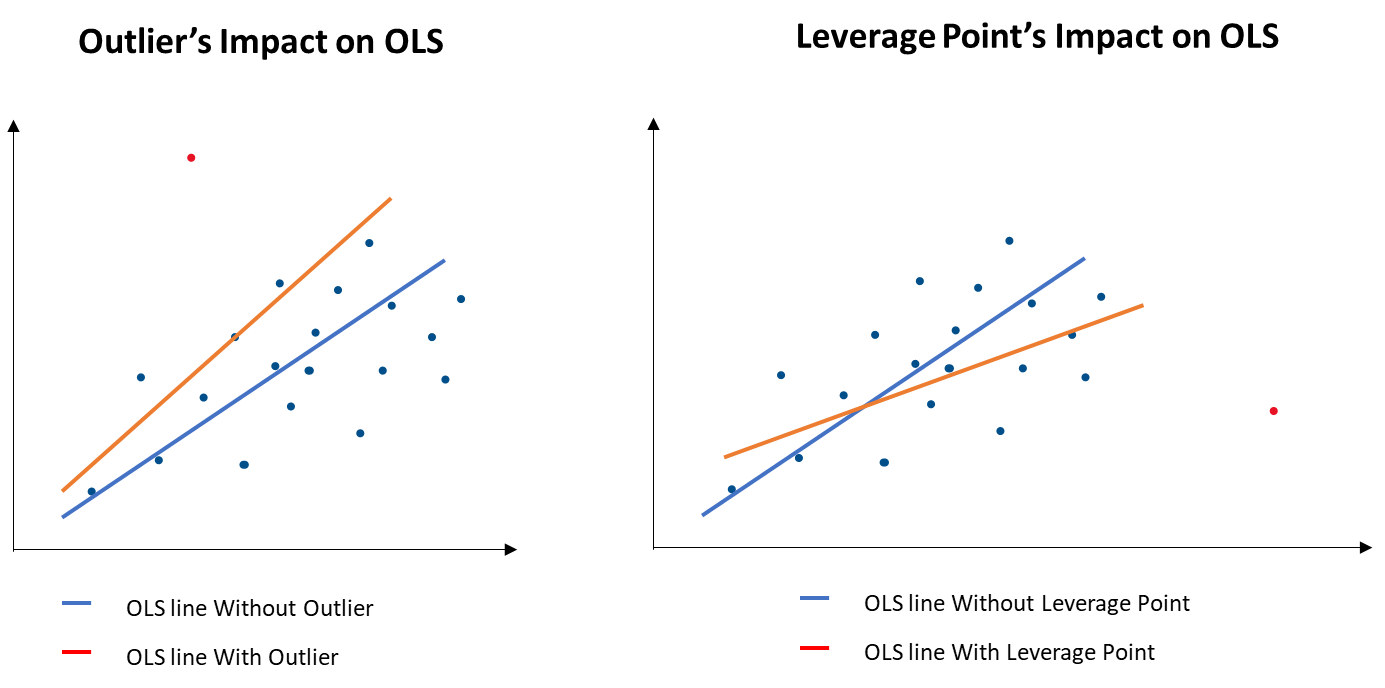


From Figure 1, we can see an outlier in the dataset; this outlier will pull the regression line closer to the outlier because the outlier has the largest distance from the regression line compared to other data points. We know from the required reading from Module 1, Lesson 1 that OLS regression minimizes the squared sum of the residuals (the distance between the data points and the regression line) to obtain coefficient estimates. Since the distance between the outlier and the regression line is the largest, the minimization mechanism will naturally pull the line closer to the outlier in order to get the smallest sum of all distances from data points to the line.

So what can we do with outliers? Remember from the last lesson how we used weight to adjust each data point's influence in weighted least square (WLS) regression. Although WLS was used to tackle unequal variance in error terms, WLS can also give less weight to a data point further away from the rest of the data points. Hence, **WLS is one option**.

When there are only a few extreme points in the dataset, we can use a scatter plot or a residual plot to detect the extreme points. However, when there are many extreme points in the dataset, it is difficult to manually remove or even detect them. We need a method that can address extreme points in the model. The weighted least square regression model shown in the last lesson is one of the methods for handling extreme points. **Robust regression is another method** that we will introduce in this lesson.

## **2. Robust Regression**

In the last lesson, we learned that a weighted least square regression model applies weight to its objective function in order to reduce the impact of extreme points. **In robust regression, different objective functions are applied to reduce the impact of extreme points**. There are several methods for choosing an objective function using robust regression. In this lesson, we will focus on **M-estimation** and will briefly talk about other methods later on in this lesson.

### **2.1 M-Estimation**

#### **2.1.1 Basics of M-Estimation**

We introduced the concept of objective function in the last lesson. An **objective function** is a function we would like to maximize or minimize. In a simple OLS regression, we minimize the following objective function:

$$ RSS (\beta_{0}, \beta_{1}) = \sum_{i=1}^{n}  e_{i}^{2} = \sum_{i=1}^{n} ( Y_{i} - \beta_{0} - \beta_{1}  X_{i} )^{2} $$

with respect to the coefficients $\beta_0 $ and $\beta_1 $ and compute $\hat{\beta}_0 $ and $\hat{\beta}_1 $ by solving the two equations associated with the first order conditions.

According to the objective function above, we want to minimize the sum of squared residuals for OLS regression. We already see that using squared residuals can put more emphasis on outliers when minimizing the objective function. A squared function is a **quadratic function**. When $f(x) = x^2, \ f(x)$ is the quadratic function of $x$. Since a **quadratic function of residuals from OLS puts a lot of emphasis on outliers, *M-estimation* proposes other function forms to avoid this issue**.

*M-Estimation* proposes the following objective function:

$$ \sum_{i=1}^{n} \rho (e_{i}) = \sum_{i=1}^{n} \rho (Y_{i} - X_{i}^{t} \beta ) $$

We can see $\rho $ is the contribution of each residual to the *M-estimation* objective function. $\rho(\cdot)$ should have the following properties:

1. $\rho (e) \geq 0 $  i.e. $\rho $ cannot be negative
2. $\rho (0) = 0$ i.e. When the argument of $\rho $ is 0, $\rho $ is also $0$
3. $\rho (e) = \rho (-e)$ i.e. $\rho $ is symmetric
4. When $|e_{i}| > |e_{j}|$, then $\rho (e_{i})> \rho (e_{j})$ i.e. $\rho $ is monotone

Let's take a quick look of some $\rho$ examples. **Two of the popular $\rho$ functions are $\rho (e) = e^{2}$ and $\rho (e) = |e|$. We will talk more about them later in this lesson**.

We then take the partial derivatives of this objective function with respect to $\beta$ and set them to $0$. We will get the following equations:

$$ \sum_{i=1}^{n} \frac{\partial \rho}{\partial e} X_{i}^{t} = 0 $$

Let's assign $\psi (e) = \frac{\partial \rho }{\partial e}$. $\ \psi$ is called an **influence function**.

We can rewrite the above equations as follows:

$$ \sum_{i=1}^{n} \psi (e_{i}) X_{i}^{t} = 0 $$

Let's define a **weight function $w (e) = \frac{\psi (e)}{e}$** and let $w(e_{i}) = w_{i}$.

We can rewrite the above function again as follows:

$$ \sum_{i=1}^{n} w_{i} e_{i} X_{i}^{t} = 0 $$


**Why did we do all these steps?** If you look at the above equation, it is the same partial derivative equation from the WLS lesson. **We have transformed the *M-estimation* to weighted least square regression**.

Now, we have to calculate the estimates of *M-estimation*. From the above description, it is the same as solving a WLS problem. From our weight formula, we know the **weights depend on residuals**. The **residuals depend on estimated coefficients**. The **coefficients depend on weights**. It is a **circle**. We usually would start from estimating the coefficients using OLS. Then, we'd get the residuals and estimate the weights, and we would estimate weighted least square regression and repeat the whole process again. This is called **iterative reweighted least squares** **regression (IRLS).**

Here are the steps of **iterative reweighted least squares** regression:

1. Use OLS to estimate initial coefficients.
2. Obtain the residuals of the OLS model and generate weights.
3. Estimate coefficients using WLS and the weights from Step 2.
4. Plug coefficients from WLS into the linear model and calculate new residuals and repeat from Step 2 to Step 4 until the coefficients converge.

#### **2.1.2 $\rho()$ Functions: Huber Method and Bisquare Method**

After setting out the steps to run an M-estimation using IRLS in the last section, we now need to find weights. How should we find weights? From the last section, we know **weight functions can be derived from $\rho $ functions**. In this section, we are going to introduce two commonly used $\rho $ functions: the Huber method and bisquare method. We will use them to derive weight functions.

The $\rho $ function for the **Huber method** is as follows:

$$
\rho_{_{Huber}} (e) = \begin{cases}
  \frac{1}{2}e^{2}, & \text{ if } |e| \leq k \\
  k |e| - \frac{1}{2}k^{2}, & \text{ if } |e| > k
\end{cases}
$$

$k$ is called a **tuning constant.** **A smaller $k$ will make the objective function more resistant to outliers**. We **usually set $k = 1.345 \sigma$**. $\ \sigma$ is the standard deviation of the errors. **Why 1.345?** If the **errors are normally distributed, we will get 95% efficiency when we estimate the errors using residuals. This level of efficiency is similar to that used for OLS regression (95%)**.

One more point: We usually use standard deviation of residuals to estimate $\sigma$. However, one outlier can make the estimated value of the standard deviation of residuals very sensitive because the mean is part of the calculation of standard deviation. Mean is sensitive to outliers. Instead, we use **median absolute deviation (MAD)** = $\text{median} | \text{residuals}|$ to estimate the standard deviation of errors $\sigma$.

Now that we know the $\rho $ function for the Huber method, we can derive the weight function. The weight function for the Huber method is as follows:

$$
w_{_{Huber}} (e) = \begin{cases}
  1, & \text{ if } |e| \leq k \\
  \frac{k}{|e|}, & \text{ if } |e| > k
\end{cases}
$$

**Figure 2: Huber Method Weight Function Chart**

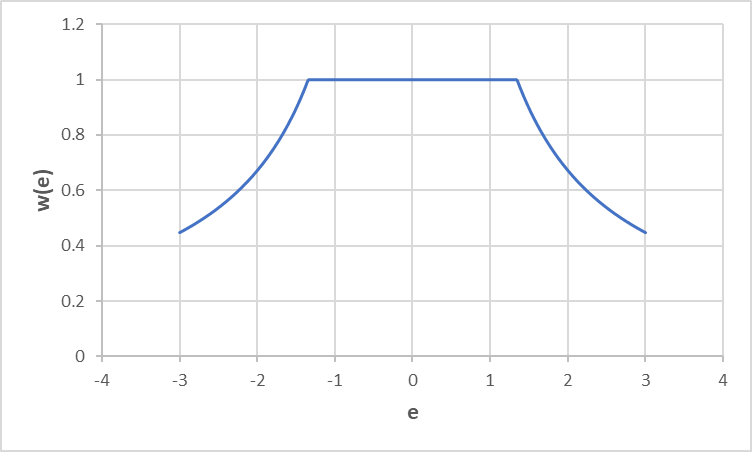


From Figure 2, we can see that the weights for data points are the same when their errors are within (-1.345, 1.345). Once the error passes the band, the value of the weight starts to drop quickly, which will give less weight to outliers.

The $\rho $ function for the **bisquare method** is as follows:

$$
\rho_{_{Bisquare}} = \begin{cases}
  \frac{k^{2}}{6} (1- (1 - (\frac{e}{k})^{2})^{3} ), & \text{ if } |e| \leq k \\
  \frac{k^{2}}{6}, & \text{ if } |e| > k
\end{cases}
$$

The concept of $k$ here is the same as the $k$ in the Huber method. For the bisquare method, **$k = 4.685 \sigma$**. It also uses MAD to estimate standard deviation of error.

The weight function for the bisquare method is as follows:

$$
w_{_{Bisquare}} (e) = \begin{cases}
  (1- (\frac{e}{k})^{2})^{2},  & \text{ if } |e| \leq k \\
  0,  & \text{ if } |e| > k
\end{cases}
$$


**Figure 3: Bisquare Method Weight Function Chart**

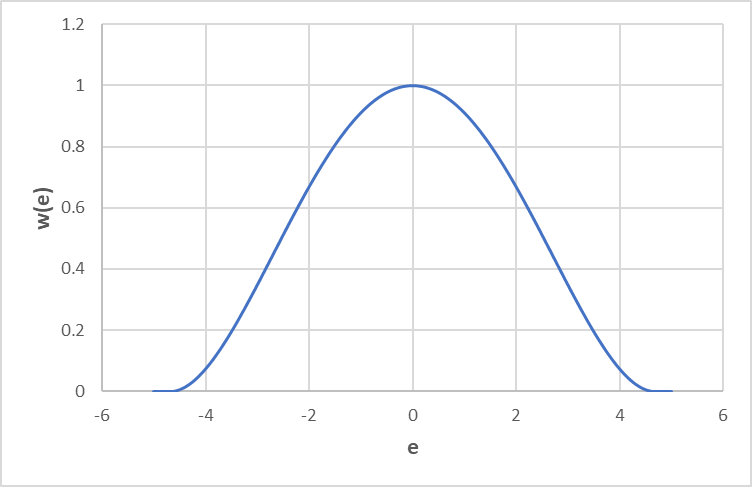


We can see from Figure 3 that the **bisquare method de-emphasizes outliers faster than the Huber method**. The bisquare method starts to decrease the weight when error begins to show up.

The residual sum of a square for OLS is also a $\rho $ function form.

$$
\rho (e)= e^{2}
$$

This function also meets all of the properties of an $\rho $ function.

The weight function for OLS is:

$$
w(e)=1
$$

From the weight function, we can see OLS gives all data points a weight of $1$ regardless of their outlier status.

#### **2.1.3 Pros and Cons of M-Estimators**

**Both the Huber method and bisquare method are better regression methods than classic OLS regression because the Huber method and bisquare method assign less weight to outliers**.

One thing that is very helpful in robust regression is outlier detection. After running a robust regression model, you can check the weight associated with each data point to identify outliers.

However, the **bisquare method is popular** because it starts to de-emphasize a data point the moment the error shows up. However, a **bisquare result is sensitive to the choice of initial coefficient estimates**. **One way to get away from this issue is to use the Huber method at the beginning to get the coefficients**. Then, **use the Huber method coefficients in the bisquare method**.

**Another issue with the Huber method and the bisquare method is that they still cannot handle leverage points (points with large X values) well**. There is **another branch of robust regression to handle this issue**: bounded influence regression. Some examples of this method include **least trimmed squares**, **least median squares**, etc.

## **3. Foreign Exchange Market Analysis Using Robust Regression**

We will continue our example from the last lesson. In the last lesson, we used WLS regression to understand **how U.S. 10-year treasury bond yield would influence the U.S. Dollar Index**. In this lesson, we are going run robust regression on the same example. We will use the Huber method and bisquare method respectively and compare the results. I will also reproduce the WLS result here to compare with the Huber method and bisquare method.


**Figure 4: Huber Method - U.S. Dollar Index Daily Return On 10-Year Treasury Bond Yield**


In [ ]:
# Robust Regression model
rr_huber = sm.RLM(
    data_set["DXY"], sm.add_constant(data_set["X10Y_TBY"]), M=sm.robust.norms.HuberT()
)
rr_huber_results = rr_huber.fit()
rr_huber_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                    DXY   No. Observations:                  250
Model:                            RLM   Df Residuals:                      248
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 23 Aug 2025                                         
Time:                        06:29:47                                         
No. Iterations:                    19                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.673e-05      0.000      0.367      0.714      -0.000       0.001
X10Y_TBY       0.0446      0.011      4.152      0.000       0.024       0.066
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

**Figure 5: Bisquare Method - U.S. Dollar Index Daily Return On 10-Year Treasury Bond Yield**


In [ ]:
# Bisquare Method model
rr_bisquare = sm.RLM(
    data_set["DXY"],
    sm.add_constant(data_set["X10Y_TBY"]),
    M=sm.robust.norms.TukeyBiweight(),
)
rr_bisquare_results = rr_bisquare.fit()
rr_bisquare_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                    DXY   No. Observations:                  250
Model:                            RLM   Df Residuals:                      248
Method:                          IRLS   Df Model:                            1
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 23 Aug 2025                                         
Time:                        06:29:47                                         
No. Iterations:                    18                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.698e-05      0.000      0.254      0.800      -0.000       0.001
X10Y_TBY       0.0515      0.011      4.797      0.000       0.030       0.073
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

**Figure 6: WLS - U.S. Dollar Index Daily Return On 10 Year Treasury Bond Yield**
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [ ]:
# WLS model
model_1 = smf.ols("DXY ~ X10Y_TBY", data=data_set).fit()

# Add Absolute residuals and fitted values to dataset columns
data_set["abs_residuals"] = np.abs(model_1.resid)
data_set["fitted_values"] = model_1.fittedvalues

# Fit OLS model with absolute residuals and fitted values
model_temp = smf.ols("abs_residuals ~ fitted_values", data=data_set).fit()

# Compute weights and add it to the data_set column
weights = model_temp.fittedvalues
weights = weights**-2
data_set["weights"] = weights

# WLS model
Y = data_set["DXY"].tolist()
X = data_set["X10Y_TBY"].tolist()
X = sm.add_constant(X)  # add a intercept point

model_WLS = sm.WLS(Y, X, data_set["weights"]).fit()
model_WLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            WLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     27.59
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           3.23e-07
Time:                        06:29:47   Log-Likelihood:                 994.52
No. Observations:                 250   AIC:                            -1985.
Df Residuals:                     248   BIC:                            -1978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.346      0.730      -0.000       0.001
x1             0.0516      0.010      5.253      0.000       0.032       0.071
==============================================================================
Omnibus:                       10.978   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               23.475
Skew:                           0.063   Prob(JB):                     7.99e-06
Kurtosis:                       4.496   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's compare the coefficients of *x10Y_TBY* from the three methods. We can see that WLS and bisquare method have similar coefficients for *x10Y_TBY* (WLS: 0.0516; Bisquare: 0.0515). It is easy to understand because both WLS and bisquare method give different weights to all data points whereas **Huber gives different weights only after a residual is big enough**.

We can also show different regression lines in a scatter plot to understand how outliers influence the regression result.


**Figure 7: Scatter Plot of U.S. Dollar Index Daily Return and 10-Year Treasury Bond Yield Daily Return with Different Regression Lines**


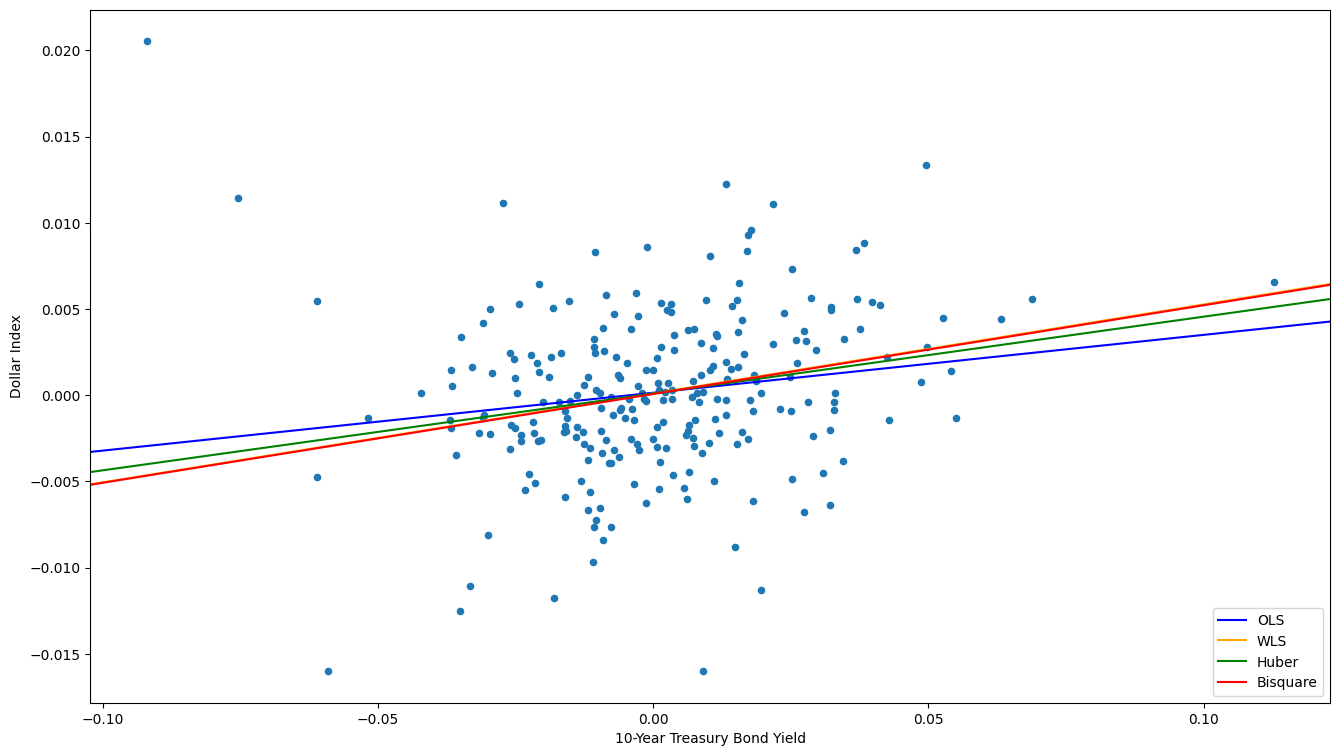

In [ ]:
# Scatter Plot of U.S. Dollar Index Daily Return and 10-Year Treasury Bond Yield Daily Return with Different Regression Lines

# scatter-plot data
scatt = data_set.plot(x="X10Y_TBY", y="DXY", kind="scatter")
scatt.set(xlabel="10-Year Treasury Bond Yield", ylabel="Dollar Index")

# plot regression lines
abline_plot(model_results=model_1, ax=scatt, color="blue", label="OLS")
abline_plot(model_results=model_WLS, ax=scatt, color="orange", label="WLS")
abline_plot(model_results=rr_huber_results, ax=scatt, color="green", label="Huber")
abline_plot(model_results=rr_bisquare_results, ax=scatt, color="red", label="Bisquare")
plt.legend(loc="lower right")
plt.show()

From Figure 7, we can see that the **WLS regression line and the bisquare regression line almost overlap**. These two lines are also furthest away from outliers at the upper left of the scatter plot. The OLS regression line and Huber regression line are flatter and are pulled closer to the outliers at the upper left. The plot shows evidence again that WLS and the bisquare method apply weights to de-emphasize any data point that has a non-zero residual. OLS applies the weight of $1$, and the Huber method applies weight after data points whose residuals are larger than $k$. Different weight schemes would lead to different regression results. After studying the above results, **either WLS or the bisquare method is a better result than OLS or the Huber method**.


## **4. Conclusion**

In this lesson, we first reviewed the impact of problem outliers and leverage points on OLS regression. We then introduced robust regression to tackle outliers. There are several methods under robust regression. We talked about the most popular one: M-estimation. Specifically, we talked about the Huber method and the bisquare method under M-estimation. We finished the theory part by discussing the pros and cons of M-estimation. Lastly, we used a foreign exchange example to demonstrate how to run the Huber method and the bisquare method. We compared the results of OLS, WLS, the Huber method and the bisquare method. In the next lesson, we will discuss another branch of regression analysis: **lasso regression**.

